In [4]:
import matplotlib.pyplot as plt
from sqlalchemy import text
from src.data.utils import create_connection_psql
from src import PG_CREDENTIALS, QUERIES, FIGURES
import pandas as pd

In [5]:
engine = create_connection_psql(PG_CREDENTIALS)

In [6]:
df = pd.read_sql_query(
    "select name, iteration, profit from model_logs where phase = 'testing'", engine
)

In [15]:
df['cumprofit'] = df.groupby('name').cumsum(0)['profit']


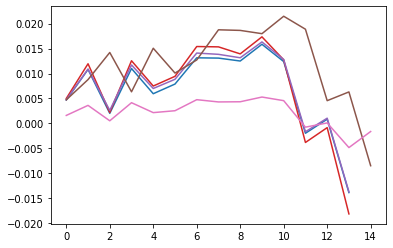

In [25]:
fig, ax = plt.subplots()
for name in df['name'].unique().tolist():
    df[df['name'] == name]['cumprofit'].reset_index(drop=True).plot(ax=ax, label=name)